# Partial Dependence Plots

while feature importance shows what vriables most affect predictions, partial dependence plots show how a feature aggects predictions.

## How it works

Like permutation importance, **partial dependence plots are calculated after a model has been fit.** The model is fit on real data that has not been artificially manipulated in any way.

In our soccer example, teams may differ in many ways. How many passes they made, shots they took, goals they scored, etc. At first glance, it seems difficult to disentangle the effect of these features.

To see how partial plots separate out the effect of each feature, we start by considering a single row of data. For example, that row of data might represent a team that had the ball 50% of the time, made 100 passes, took 10 shots and scored 1 goal.

We will use the fitted model to predict our outcome (probability their player won "man of the match"). But we **repeatedly alter the value for one variable** to make a series of predictions. We could predict the outcome if the team had the ball only 40% of the time. We then predict with them having the ball 50% of the time. Then predict again for 60%. And so on. We trace out predicted outcomes (on the vertical axis) as we move from small values of ball possession to large values (on the horizontal axis).

In this description, we used only a single row of data. Interactions between features may cause the plot for a single row to be atypical. So, we repeat that mental experiment with multiple rows from the original dataset, and we plot the average predicted outcome on the vertical axis.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from pdpbox import pdp, get_dataset, info_plots
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.0.3
module://ipykernel.pylab.backend_inline


In [3]:
# matplotlib.use('nbagg')
%matplotlib nbagg
print(matplotlib.get_backend())
from matplotlib import pyplot as plt

nbAgg


In [4]:
data = pd.read_csv("../data/FIFA_2018_Statistics.csv")
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [5]:
y = (data['Man of the Match'] == "Yes")  # convert from string "yes/no" to binary

In [6]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
print(f"[-] feature names:\n[^--] {feature_names}")
x = data[feature_names]
print(f"[-] x shape: {x.shape}")

[-] feature names:
[^--] ['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', 'Goals in PSO']
[-] x shape: (128, 18)


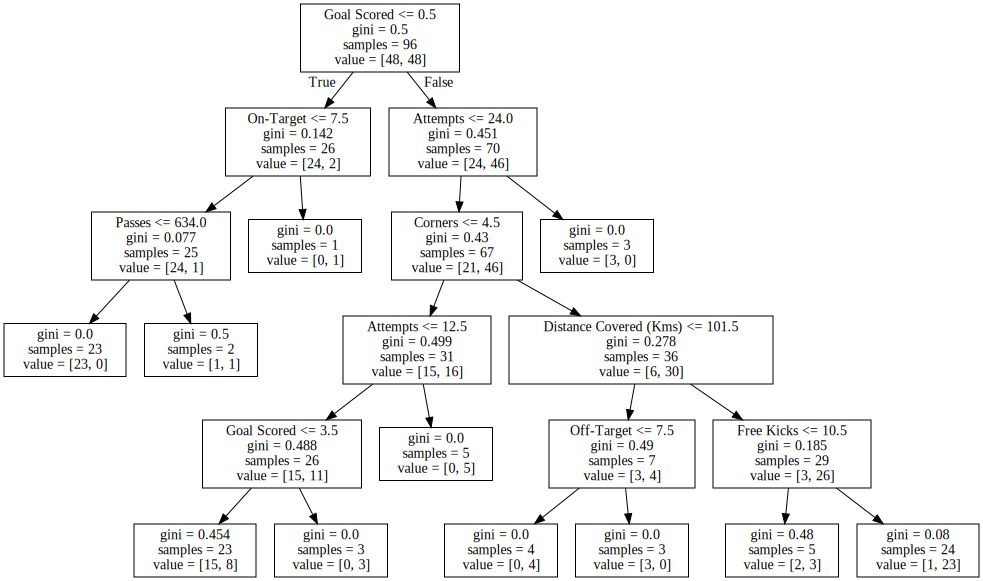

In [7]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_x, train_y)

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

<IPython.core.display.Javascript object>


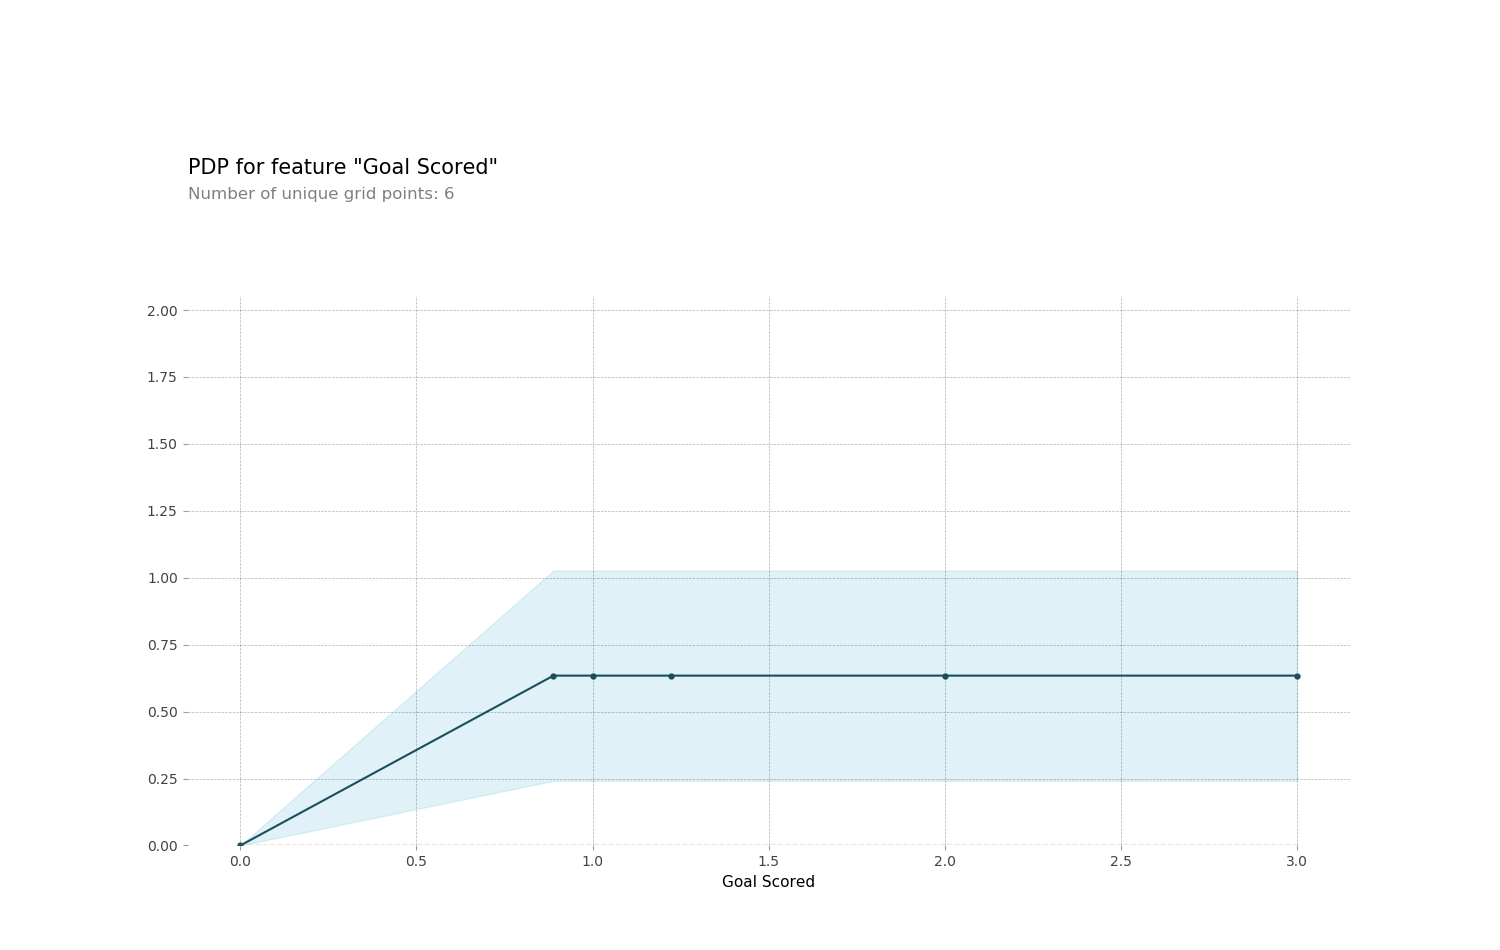

In [8]:
# Partial Dependency Plot
# create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_x, model_features=feature_names, feature='Goal Scored')
# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

* The y axis is interpreted as **change in the prediction** from what it would be predicted at the baseline or leftmost value.
* A blue shaded area indicates level of confidence.

From this particular graph, we see that scoring a goal substantially increases your chances of winning "Man of the Match". But extra goals beyond that appear to have little impact on predictions.

In [ ]:
rf_model = RandomForestClassifier(random_state=0).fit(train_x, train_y)

pdp_goals = pdp.pdp_isolate(model=rf_model, dataset=val_x, model_features=feature_names, feature='Goal Scored')
# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

As per Random Forest Model Scoring a goal substantially increase the chance of winning the "Man of the Match", However if you score 2 goals its better...

Another example plot

In [ ]:
feature_to_plot = "Distance Covered (Kms)"
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_x, model_features=feature_names, feature=feature_to_plot)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()